In [82]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../.')
import datasets

In [83]:
sample_size = 400
feature_dimension = 50
# Sample wise double descent for linear model only affected by input Dimension, even if some of input is disturbance (useless) term
used_feature = feature_dimension
noise_level = 0
bias = 0
y_dimension = 5
test_size = 0.5
# set a random seed (int) if you want to the datasets to be fixed
RAND_ST = None

X, y = datasets.linear_regression_with_gaussian(sample_size=sample_size, feautre_size=feature_dimension, used_feature=used_feature, noise_level=noise_level, bias=bias, y_dimension=y_dimension, random_state=RAND_ST)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

weight = np.random.random((X.shape[1], y_dimension))
y = X.dot(weight)

model_range = 50


# Sklearn already has bias term inside the nn
# X = np.column_stack((np.ones(sample_size), X))

Noiseless Data

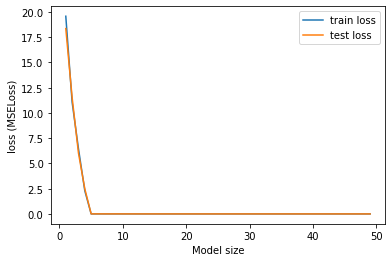

In [84]:
train_losses = []
test_losses = []

model_size = [size for size in range(1, model_range, 1)]

for size in model_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = MLPRegressor(hidden_layer_sizes=(size,), activation='identity', solver='sgd', alpha=0, beta_1=0, beta_2=0, batch_size=1, max_iter=5000, momentum=0, validation_fraction=0.0).fit(X_train, y_train)
    
    train_losses.append(np.sum(np.power(model.predict(X_train)-y_train, 2)) / X_test.shape[0])
    test_losses.append(np.sum(np.power(model.predict(X_test)-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:, :size])-y_train, 2)) / X_test.shape[0])
    # print(np.sum(np.power(model.predict(X_test[:, :size])-y_test, 2)) / X_test.shape[0])
    # print(size)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("Model size")
plt.ylabel("loss (MSELoss)")
plt.plot(model_size, train_losses, label = "train loss")
plt.plot(model_size, test_losses, label = "test loss")
plt.legend()
plt.show()

Noisy Data

In [85]:
X = X + np.random.normal(0, 0.3, (sample_size, X.shape[1]))

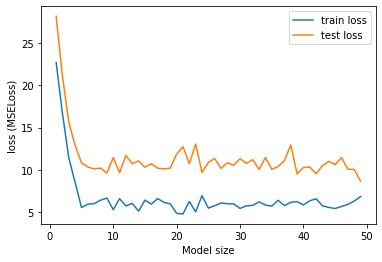

In [86]:
train_losses = []
test_losses = []

model_size = [size for size in range(1, model_range, 1)]

for size in model_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = MLPRegressor(hidden_layer_sizes=(size,), activation='identity', solver='sgd', alpha=0, beta_1=0, beta_2=0, batch_size=1, max_iter=5000, momentum=0, validation_fraction=0.0).fit(X_train, y_train)
    
    train_losses.append(np.sum(np.power(model.predict(X_train)-y_train, 2)) / X_test.shape[0])
    test_losses.append(np.sum(np.power(model.predict(X_test)-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:, :size])-y_train, 2)) / X_test.shape[0])
    # print(np.sum(np.power(model.predict(X_test[:, :size])-y_test, 2)) / X_test.shape[0])
    # print(size)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("Model size")
plt.ylabel("loss (MSELoss)")
plt.plot(model_size, train_losses, label = "train loss")
plt.plot(model_size, test_losses, label = "test loss")
plt.legend()
plt.show()